## Import Library

In [1]:
# load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# load dataset
from sklearn.datasets import load_boston

In [11]:
# data
data = load_boston()

In [12]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [17]:
df['target'] = data.target

In [19]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA

In [23]:
# count nan values
print('Nan Values :\n{}'.format(np.sum(df.isna())))

Nan Values :
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


## Joinplot

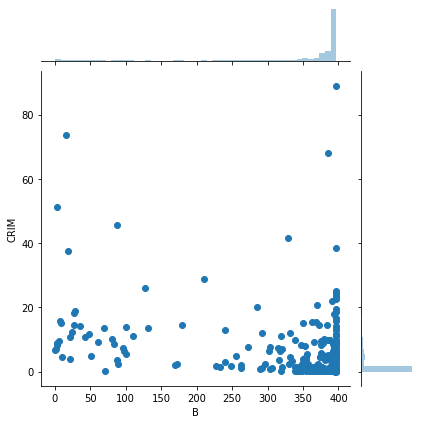

In [36]:
# plt.figure(figsize=(9, 7), dpi=80)
# plt.title('CRIM VS  proportion of blacks by town ')
sns.jointplot(x='B', y='CRIM', data=df)
plt.show()

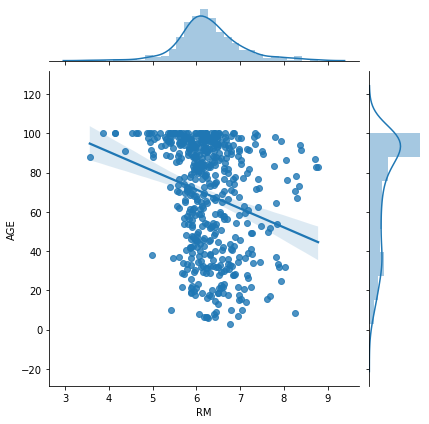

In [42]:
# plt.figure(figsize=(12, 8))
sns.jointplot(x='RM', y='AGE', data=df, kind='reg')
plt.show()

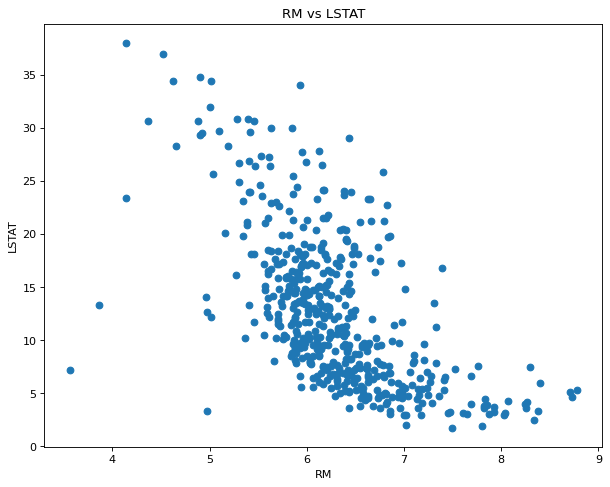

In [52]:
plt.figure(figsize=(9, 7), dpi=80)
plt.title('RM vs LSTAT')
plt.scatter(df['RM'], df['LSTAT'])
plt.xlabel('RM')
plt.ylabel('LSTAT')
plt.show()

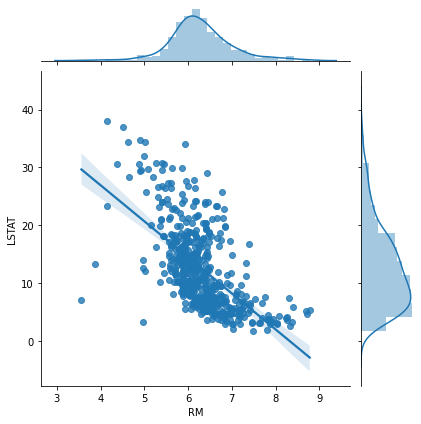

In [54]:
sns.jointplot(x='RM', y='LSTAT', data=df, kind='reg')

## Heatmap Correlation

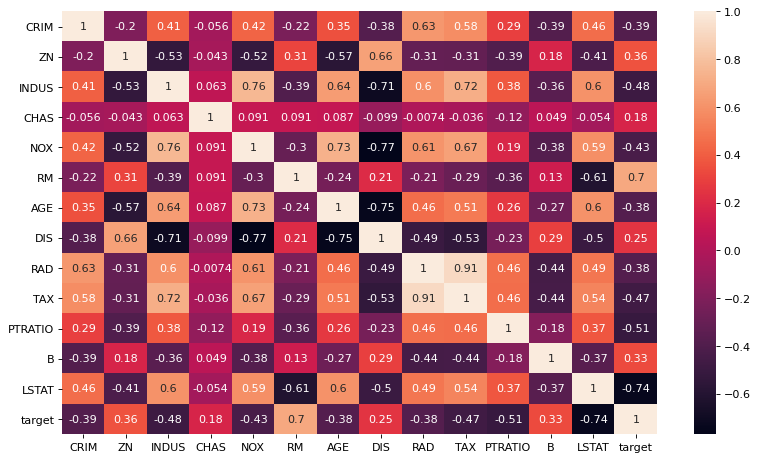

In [57]:
plt.figure(figsize=(12, 7), dpi=80)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [60]:
x = df[['CRIM', 'ZN','INDUS','NOX','RM','AGE','RAD','TAX']].values
y = df[['target']].values

## Create Model

In [63]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [65]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, random_state=42, test_size=0.32)

In [66]:
lr = LinearRegression()

In [67]:
# fit 
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
# prediction
y_pred = lr.predict(x_test)

In [75]:
print(f"Score     : {lr.score(x_test, y_test)}")
print(f"R2 Score  : {r2_score(y_test, y_pred)}")

Score     : 0.6047814587616529
R2 Score  : 0.6047814587616529


## Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
GB = GradientBoostingRegressor(n_estimators=400).fit(x_train, y_train)

/home/amir/.local/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
y_pred = GB.predict(x_test)

In [94]:
print(f"Score     : {GB.score(x_test, y_test)}")
print(f"R2 Score  : {r2_score(y_test, y_pred)}") 

Score     : 0.8162642869391812
R2 Score  : 0.8162642869391812


# RandomForestRegressor

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
RFR = RandomForestRegressor(n_estimators=800).fit(x_train, y_train)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [101]:
rfr_pred = RFR.predict(x_test)

In [109]:
print(f"Score     : {RFR.score(x_test, y_test)}")
print(f"R2 Score  : {r2_score(y_test, rfr_pred)}") 

Score     : 0.7980589735566206
R2 Score  : 0.7980589735566205
